In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

    Прочитайте csv файл (використовуйте функцію read_csv)
    Виведіть перші п'ять рядків (використовується функція head)
    Виведіть розміри датасету (використовуйте атрибут shape)
    Питання: Про скільки книг зберігає дані датасет?

    Відповідь: 351 унікальная книга

In [3]:
df = pd.read_csv("bestsellers with categories.csv")
df.head()


,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [4]:
df.shape

(550, 7)

In [5]:
uniques = df.drop_duplicates(subset=["Name"])
uniques.shape


(351, 7)

In [6]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

Первинне дослідження даних


    Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)
    Відповідь: Чи є в якихось змінних пропуски? Ні


In [7]:
df.isna().sum()

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

    Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)
    Які є унікальні жанри? 
    Відповідь: ['Non Fiction', 'Fiction']


In [8]:
pd.unique(df["genre"])

array(['Non Fiction', 'Fiction'], dtype=object)

    Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')


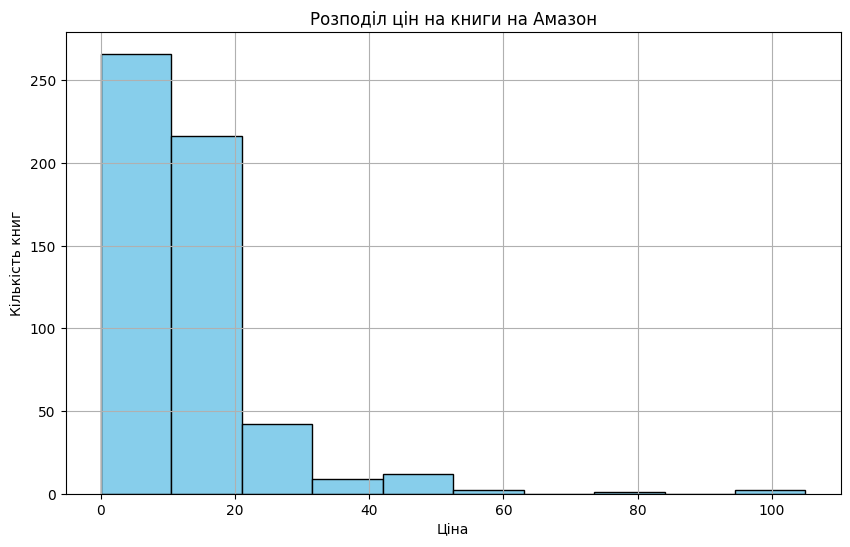

In [9]:
plt.figure(figsize=(10, 6))  
df['price'].plot(kind='hist', bins=10, color='skyblue', edgecolor='black')
plt.title('Розподіл цін на книги на Амазон')  
plt.xlabel('Ціна') 
plt.ylabel('Кількість книг') 
plt.grid(True)  
plt.show()

    Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)
    Відповідь: Максимальна ціна?   0
    Відповідь: Мінімальна ціна?    105
    Відповідь: Середня ціна?       13.1
    Відповідь: Медіанна ціна?      11.0

In [10]:
print("MIN", df["price"].min())
print("MAX", df["price"].max())
print("AVG", df["price"].mean())
print("Median", df["price"].median())
# print(df[df["price"]==0])

MIN 0
MAX 105
AVG 13.1
Median 11.0


Пошук та сортування даних


In [11]:
#   Відповідь: Який рейтинг у датасеті найвищий? Відповідь: 4.9
df["user_rating"].max()

4.9

In [12]:
# Відповідь: Скільки книг мають такий рейтинг? Відповідь:  28
temp = df[df["user_rating"] == 4.9]
pd.unique(temp["name"]).shape

(28,)

In [13]:
# Відповідь: Яка книга має найбільше відгуків? Відповідь:  'The Fault in Our Stars'
df.groupby("name")["reviews"].sum().idxmax()



'The Fault in Our Stars'

In [14]:
# Відповідь: З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? 
# Відповідь:   Publication Manual of the American Psychologic
sort_df = df[df["year"]==2015].sort_values(by='user_rating', ascending=False)
sort_df = sort_df[sort_df["price"]==sort_df["price"].max()]
sort_df["name"]

277    Publication Manual of the American Psychologic...
Name: name, dtype: object

In [15]:
# Відповідь: Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? 
# Відповідь: 20
len(df[(df["year"]==2010) & (df["genre"]=="Fiction")])

20

In [18]:
# Відповідь: Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? 
# Відповідь:  1
df[(df["user_rating"] == 4.9) & ((df["year"] == 2010) | (df["year"] == 2011))].shape[0]
# df[(df["user_rating"] == 4.9) & ((df["year"] == 2010) | (df["year"] == 2011))]

1

  
    
    І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).
  

In [20]:
df[(df["year"]==2015)&(df["price"]<8)].sort_values(by='price')

,name,author,user_rating,reviews,price,year,genre
507,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction
210,Laugh-Out-Loud Jokes for Kids,Rob Elliott,4.6,6990,4,2015,Non Fiction
206,Knock-Knock Jokes for Kids,Rob Elliott,4.5,3673,4,2015,Non Fiction
111,First 100 Words,Roger Priddy,4.7,17323,4,2015,Non Fiction
123,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2015,Fiction
54,Creative Haven Creative Cats Coloring Book (Ad...,Marjorie Sarnat,4.8,4022,4,2015,Non Fiction
63,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,10922,5,2015,Fiction
89,Dover Creative Haven Art Nouveau Animal Design...,Marty Noble,4.6,2134,5,2015,Non Fiction
478,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2015,Fiction
201,Killing Reagan: The Violent Assault That Chang...,Bill O'Reilly,4.6,5235,5,2015,Non Fiction


In [23]:
#   Відповідь: Яка книга остання у відсортованому списку? 
# Відповідь: Old School (Diary of a Wimpy Kid #10)
df[(df["year"]==2015)&(df["price"]<8)].sort_values(by='price').tail(1)["name"]

253    Old School (Diary of a Wimpy Kid #10)
Name: name, dtype: object

Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів

In [26]:
# Відповідь: Максимальна ціна для жанру Fiction: Відповідь: 82
df.groupby("genre")["price"].agg(["min", "max"])

,min,max
genre,,
Fiction,0,82
Non Fiction,0,105



Відповідь: Мінімальна ціна для жанру Fiction: Відповідь: 0
Відповідь: Максимальна ціна для жанру Non Fiction: Відповідь: 105
Відповідь: Мінімальна ціна для жанру Non Fiction: Відповідь: 0

новий датафрейм, який вміщатиме кількість книг для кожного з авторів

In [31]:
author_count = df.groupby("author")["name"].agg(["count"])
print(author_count.shape)
author_count.sort_values(by="count", ascending=False)

(248, 1)


,count
author,
Jeff Kinney,12
Gary Chapman,11
Suzanne Collins,11
Rick Riordan,11
American Psychological Association,10
...,...
David Grann,1
Larry Schweikart,1
David McCullough,1


Відповідь: Якої розмірності вийшла таблиця? Відповідь: (248,1)
Відповідь: Який автор має найбільше книг? Відповідь: Jeff Kinney
Відповідь: Скільки книг цього автора? Відповідь: 12

другий датафрейм, який буде вміщати середній рейтинг для кожного автора 

In [33]:
author_rating = df.groupby("author")["user_rating"].agg(["mean"])
author_rating.sort_values(by="mean")

,mean
author,
Donna Tartt,3.9
Gillian Flynn,4.0
Muriel Barbery,4.0
Gallup,4.0
Ian K. Smith M.D.,4.1
...,...
Lin-Manuel Miranda,4.9
Patrick Thorpe,4.9
Nathan W. Pyle,4.9


Відповідь: У якого автора середній рейтинг мінімальний? Відповідь: Donna Tartt
Відповідь: Який у цього автора середній рейтинг? Відповідь: 3.9

З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг

In [37]:
famous_authors=pd.concat([author_rating, author_count], axis=1)
# Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом
famous_authors.sort_values(by=["count", "mean"])

,mean,count
author,,
Muriel Barbery,4.000000,1
Chris Cleave,4.100000,1
Ian K. Smith M.D.,4.100000,1
Pierre Dukan,4.100000,1
Elizabeth Strout,4.200000,1
...,...,...
American Psychological Association,4.500000,10
Suzanne Collins,4.663636,11
Gary Chapman,4.736364,11


Який автор перший у списку?  Відповідь: Muriel Barbery

Зв'язок між кількістю книг автора та його рейтингом

<Axes: xlabel='count', ylabel='mean'>

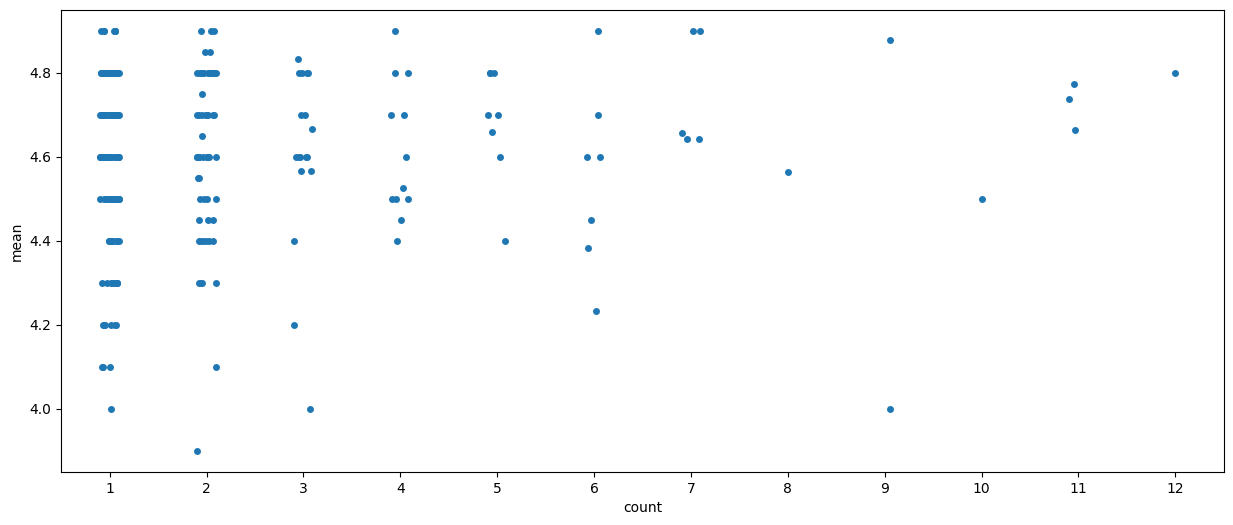

In [45]:
plt.figure(figsize=(15, 6))
sns.stripplot(x="count", y="mean", data=famous_authors)

Графік залежності рейтингу книги та кількості відгуків e 2015 році

<Axes: xlabel='user_rating', ylabel='reviews'>

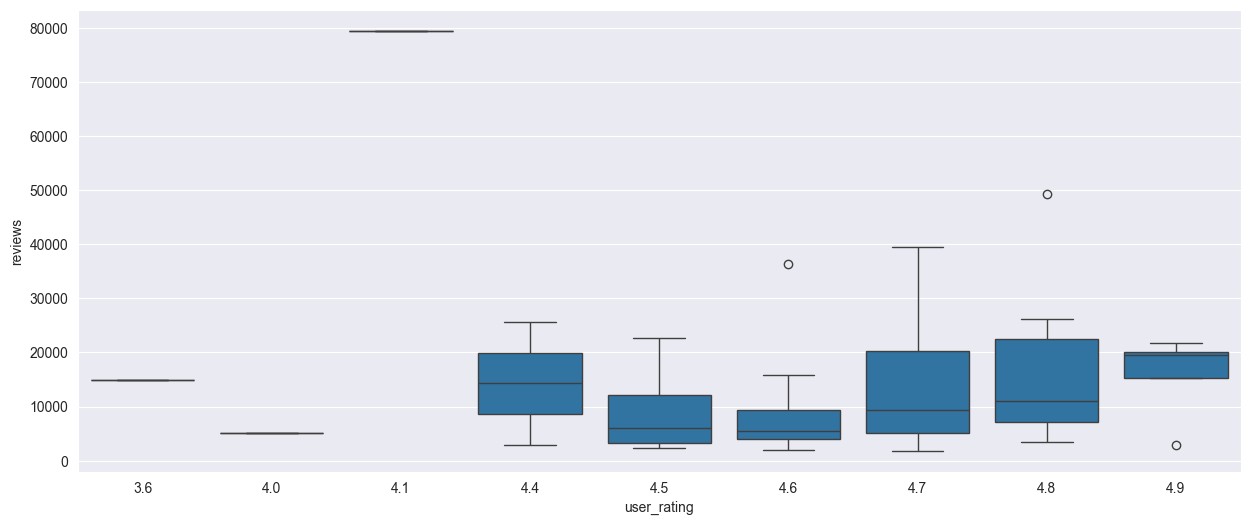

In [57]:

plt.figure(figsize=(15, 6))
sns.set_style("darkgrid")
sns.boxplot(x="user_rating", y="reviews", data=df[(df["year"]==2015)])

Розподіл жанрів та ціни на книжки по рокам

<Axes: xlabel='year', ylabel='price'>

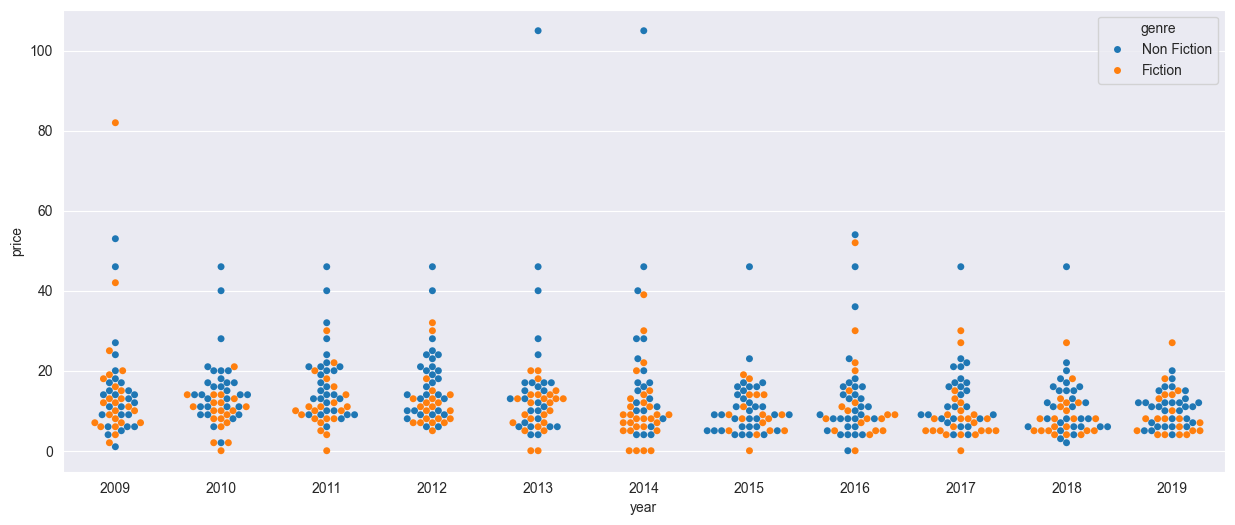

In [88]:
plt.figure(figsize=(15, 6))
temp = df[(df["year"]==2015)&(df["price"]<8)].sort_values(by='price')

# plt.barh(temp["author"], temp["sum"])
# plt.show()
sns.swarmplot(x='year', y='price', hue="genre", data=df)